In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Common_Worker import Common_Worker as cw
from Data_Holder import Data_Holder
import pandas as pd

In [3]:
# these values are taken from 'Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings' by Tolga Bolukbasi et al., found under https://github.com/tolga-b/debiaswe. 
# They represent cosine similarity to 'man' and 'woman', respectively 
profs=[["accountant", 0.0, 0.4], ["acquaintance", 0.0, 0.0], ["actor", 0.8, 0.0], ["actress", -1.0, 0.0], ["adjunct_professor", 0.0, 0.5], ["administrator", 0.0, 0.2], ["adventurer", 0.0, 0.5], ["advocate", 0.0, -0.1], ["aide", 0.0, -0.2], ["alderman", 0.7, 0.2], ["alter_ego", 0.0, 0.0], ["ambassador", 0.0, 0.7], ["analyst", 0.0, 0.4], ["anthropologist", 0.0, 0.4], ["archaeologist", 0.0, 0.6], ["archbishop", 0.4, 0.5], ["architect", 0.1, 0.6], ["artist", 0.0, -0.2], ["artiste", -0.1, -0.2], ["assassin", 0.1, 0.8], ["assistant_professor", 0.1, 0.4], ["associate_dean", 0.0, 0.4], ["associate_professor", 0.0, 0.4], ["astronaut", 0.1, 0.8], ["astronomer", 0.1, 0.5], ["athlete", 0.0, 0.7], ["athletic_director", 0.1, 0.7], ["attorney", 0.0, 0.3], ["author", 0.0, 0.1], ["baker", 0.0, -0.1], ["ballerina", -0.5, -0.5], ["ballplayer", 0.2, 0.8], ["banker", 0.0, 0.6], ["barber", 0.5, 0.5], ["baron", 0.6, 0.3], ["barrister", 0.1, 0.4], ["bartender", 0.0, 0.3], ["biologist", 0.0, 0.1], ["bishop", 0.6, 0.4], ["bodyguard", 0.1, 0.9], ["bookkeeper", 0.0, -0.4], ["boss", 0.0, 0.7], ["boxer", 0.1, 0.9], ["broadcaster", -0.1, 0.4], ["broker", 0.1, 0.5], ["bureaucrat", 0.1, 0.5], ["businessman", 0.8, 0.2], ["businesswoman", -0.9, -0.1], ["butcher", 0.1, 0.9], ["butler", 0.5, 0.5], ["cab_driver", 0.1, 0.8], ["cabbie", 0.1, 0.6], ["cameraman", 0.8, 0.1], ["campaigner", 0.0, 0.2], ["captain", 0.1, 0.6], ["cardiologist", 0.1, 0.5], ["caretaker", 0.0, -0.9], ["carpenter", 0.1, 0.8], ["cartoonist", 0.0, 0.5], ["cellist", -0.1, 0.0], ["chancellor", 0.1, 0.6], ["chaplain", 0.1, 0.6], ["character", 0.0, 0.0], ["chef", 0.0, 0.5], ["chemist", 0.0, 0.2], ["choreographer", -0.2, -0.2], ["cinematographer", 0.0, 0.5], ["citizen", 0.0, 0.0], ["civil_servant", 0.0, 0.2], ["cleric", 0.3, 0.3], ["clerk", 0.0, -0.5], ["coach", 0.1, 0.8], ["collector", 0.0, 0.4], ["colonel", 0.1, 0.8], ["columnist", 0.0, 0.2], ["comedian", 0.0, 0.3], ["comic", 0.1, 0.1], ["commander", 0.1, 0.8], ["commentator", 0.0, 0.4], ["commissioner", 0.0, 0.8], ["composer", 0.1, 0.4], ["conductor", 0.1, 0.6], ["confesses", 0.0, 0.0], ["congressman", 0.7, 0.3], ["constable", 0.2, 0.6], ["consultant", 0.0, 0.1], ["cop", 0.2, 0.6], ["correspondent", 0.0, 0.0], ["councilman", 0.8, 0.1], ["councilor", -0.1, -0.1], ["counselor", 0.0, -0.1], ["critic", 0.1, 0.4], ["crooner", 0.2, 0.2], ["crusader", 0.1, 0.7], ["curator", -0.1, 0.2], ["custodian", 0.1, 0.9], ["dad", 1.0, 0.0], ["dancer", -0.1, -0.9], ["dean", 0.2, 0.7], ["dentist", 0.0, 0.7], ["deputy", 0.1, 0.7], ["dermatologist", 0.0, -0.3], ["detective", 0.1, 0.5], ["diplomat", 0.0, 0.5], ["director", 0.1, 0.6], ["disc_jockey", 0.2, 0.6], ["doctor", 0.0, 0.7], ["doctoral_student", 0.0, 0.3], ["drug_addict", 0.0, 0.0], ["drummer", 0.0, 0.9], ["economics_professor", 0.1, 0.6], ["economist", 0.1, 0.5], ["editor", 0.1, 0.4], ["educator", 0.0, -0.5], ["electrician", 0.1, 0.8], ["employee", 0.0, 0.0], ["entertainer", 0.0, 0.0], ["entrepreneur", 0.0, 0.5], ["environmentalist", 0.0, -0.4], ["envoy", 0.1, 0.2], ["epidemiologist", 0.0, 0.0], ["evangelist", 0.1, 0.4], ["farmer", 0.1, 0.8], ["fashion_designer", -0.2, -0.4], ["fighter_pilot", 0.2, 0.7], ["filmmaker", 0.1, 0.3], ["financier", 0.1, 0.5], ["firebrand", 0.0, 0.1], ["firefighter", 0.1, 0.7], ["fireman", 0.8, 0.2], ["fisherman", 0.9, 0.1], ["footballer", 0.4, 0.5], ["foreman", 0.5, 0.4], ["freelance_writer", 0.0, 0.0], ["gangster", 0.2, 0.7], ["gardener", -0.1, 0.0], ["geologist", 0.0, 0.4], ["goalkeeper", 0.1, 0.5], ["graphic_designer", 0.0, 0.2], ["guidance_counselor", 0.0, 0.0], ["guitarist", 0.1, 0.5], ["hairdresser", -0.2, -0.8], ["handyman", 0.8, 0.2], ["headmaster", 0.4, 0.2], ["historian", 0.0, 0.5], ["hitman", 0.8, 0.2], ["homemaker", -0.1, -0.9], ["hooker", -0.2, -0.8], ["housekeeper", -0.2, -0.8], ["housewife", -1.0, 0.0], ["illustrator", 0.0, 0.2], ["industrialist", 0.1, 0.7], ["infielder", 0.1, 0.5], ["inspector", 0.1, 0.5], ["instructor", 0.0, -0.3], ["interior_designer", -0.2, -0.6], ["inventor", 0.1, 0.5], ["investigator", 0.1, 0.5], ["investment_banker", 0.1, 0.7], ["janitor", 0.1, 0.9], ["jeweler", 0.1, 0.3], ["journalist", -0.1, 0.3], ["judge", 0.0, 0.7], ["jurist", 0.0, 0.0], ["laborer", 0.1, 0.9], ["landlord", 0.1, 0.4], ["lawmaker", 0.0, 0.7], ["lawyer", 0.1, 0.5], ["lecturer", 0.0, 0.2], ["legislator", 0.1, 0.7], ["librarian", -0.1, -0.9], ["lieutenant", 0.1, 0.7], ["lifeguard", 0.0, 0.6], ["lyricist", 0.0, -0.2], ["maestro", 0.1, 0.5], ["magician", 0.1, 0.7], ["magistrate", 0.0, 0.8], ["maid", -0.4, -0.6], ["major_leaguer", 0.2, 0.7], ["manager", 0.0, 0.6], ["marksman", 0.6, 0.4], ["marshal", 0.1, 0.7], ["mathematician", 0.0, 0.8], ["mechanic", 0.3, 0.6], ["mediator", 0.0, -0.2], ["medic", 0.1, 0.4], ["midfielder", 0.3, 0.5], ["minister", 0.1, 0.8], ["missionary", 0.0, 0.3], ["mobster", 0.1, 0.9], ["monk", 0.8, 0.1], ["musician", 0.0, 0.0], ["nanny", -0.3, -0.7], ["narrator", 0.0, 0.2], ["naturalist", 0.0, -0.2], ["negotiator", 0.0, 0.3], ["neurologist", 0.0, 0.6], ["neurosurgeon", 0.0, 0.7], ["novelist", 0.0, 0.0], ["nun", -0.8, -0.1], ["nurse", -0.1, -0.9], ["observer", 0.0, -0.1], ["officer", 0.1, 0.8], ["organist", -0.2, -0.3], ["painter", 0.0, 0.2], ["paralegal", -0.1, -0.4], ["parishioner", 0.0, 0.1], ["parliamentarian", 0.0, 0.6], ["pastor", 0.3, 0.7], ["pathologist", 0.0, 0.3], ["patrolman", 1.0, 0.0], ["pediatrician", 0.0, -0.2], ["performer", 0.0, -0.2], ["pharmacist", 0.0, 0.3], ["philanthropist", 0.0, 0.3], ["philosopher", 0.0, 0.8], ["photographer", 0.0, -0.1], ["photojournalist", 0.0, 0.1], ["physician", 0.0, 0.6], ["physicist", 0.1, 0.7], ["pianist", 0.0, -0.1], ["planner", 0.0, -0.3], ["plastic_surgeon", 0.2, 0.4], ["playwright", 0.0, 0.5], ["plumber", 0.1, 0.8], ["poet", 0.0, -0.1], ["policeman", 0.8, 0.2], ["politician", 0.0, 0.5], ["pollster", 0.0, 0.3], ["preacher", 0.2, 0.7], ["president", 0.1, 0.9], ["priest", 0.7, 0.3], ["principal", 0.0, 0.3], ["prisoner", 0.1, 0.6], ["professor", 0.1, 0.4], ["professor_emeritus", 0.0, 0.5], ["programmer", 0.2, 0.6], ["promoter", 0.0, 0.3], ["proprietor", 0.1, 0.4], ["prosecutor", -0.1, 0.3], ["protagonist", 0.0, 0.1], ["protege", 0.0, 0.2], ["protester", -0.1, 0.0], ["provost", 0.0, 0.4], ["psychiatrist", 0.0, -0.2], ["psychologist", 0.0, 0.0], ["publicist", -0.1, -0.2], ["pundit", 0.0, 0.2], ["rabbi", 0.2, 0.6], ["radiologist", 0.0, -0.3], ["ranger", 0.2, 0.7], ["realtor", -0.2, -0.2], ["receptionist", -0.3, -0.7], ["registered_nurse", -0.1, -0.9], ["researcher", 0.0, 0.1], ["restaurateur", 0.0, 0.2], ["sailor", 0.1, 0.8], ["saint", 0.2, 0.3], ["salesman", 0.8, 0.2], ["saxophonist", 0.1, 0.5], ["scholar", 0.0, 0.6], ["scientist", 0.0, 0.5], ["screenwriter", 0.1, 0.4], ["sculptor", 0.0, 0.5], ["secretary", -0.2, -0.8], ["senator", 0.1, 0.7], ["sergeant", 0.1, 0.7], ["servant", 0.0, 0.1], ["serviceman", 0.7, 0.3], ["sheriff_deputy", 0.1, 0.8], ["shopkeeper", 0.0, 0.5], ["singer", 0.0, -0.2], ["singer_songwriter", 0.0, -0.3], ["skipper", 0.1, 0.7], ["socialite", -0.4, -0.3], ["sociologist", 0.0, -0.2], ["soft_spoken", -0.1, -0.9], ["soldier", 0.3, 0.6], ["solicitor", 0.1, 0.3], ["solicitor_general", 0.0, 0.5], ["soloist", -0.1, -0.3], ["sportsman", 0.9, 0.1], ["sportswriter", 0.1, 0.9], ["statesman", 0.6, 0.4], ["steward", 0.4, -0.1], ["stockbroker", 0.1, 0.5], ["strategist", 0.0, 0.3], ["student", 0.0, 0.0], ["stylist", -0.2, -0.7], ["substitute", -0.1, -0.1], ["superintendent", 0.0, 0.9], ["surgeon", 0.1, 0.7], ["surveyor", 0.0, 0.5], ["swimmer", 0.0, 0.0], ["taxi_driver", 0.1, 0.9], ["teacher", 0.0, -0.8], ["technician", 0.1, 0.6], ["teenager", 0.0, -0.1], ["therapist", -0.1, -0.4], ["trader", 0.1, 0.6], ["treasurer", 0.0, -0.3], ["trooper", 0.2, 0.5], ["trucker", 0.2, 0.7], ["trumpeter", 0.0, 0.2], ["tutor", 0.0, -0.3], ["tycoon", 0.1, 0.7], ["undersecretary", 0.0, -0.3], ["understudy", 0.0, 0.0], ["valedictorian", 0.0, 0.0], ["vice_chancellor", 0.0, 0.6], ["violinist", -0.1, -0.3], ["vocalist", 0.0, -0.3], ["waiter", 1.0, 0.0], ["waitress", -0.9, -0.1], ["warden", 0.1, 0.9], ["warrior", 0.1, 0.9], ["welder", 0.3, 0.6], ["worker", 0.0, 0.3], ["wrestler", 0.2, 0.6], ["writer", 0.0, 0.0]]

In [3]:
coref=pd.read_csv('../Data/Words/corefbias.csv',encoding = "utf-8",delimiter=';',error_bad_lines=False)

In [4]:
coref

,Male biased,Val Male,Female biased,Val Female
0,supervisor,44.0,cashier,73
1,janitor,34.0,teacher,78
2,cook,38.0,nurse,90
3,mover,18.0,assistant,85
4,laborer,3.5,secretary,95
5,construction_worker,3.5,auditor,61
6,chief,27.0,cleaner,89
7,developer,20.0,receptionist,90
8,carpenter,2.1,clerk,72
9,manager,43.0,counselor,73


In [5]:
co_male=[list(coref.iloc[i])[:2] for i in range(len(coref))]
co_female=[list(coref.iloc[i])[2:] for i in range(len(coref))]

In [35]:
profs=[[w,d,s] for w,d,s in profs if d>-.3 and d<.3]

In [6]:
#DONT TOUCH
all_data=Data_Holder()

Setting a common vocabulary...
Done!


In [7]:
#read in antonym pairs and test points...
f=open('../Data/Words/test_words.txt')
antonyms = [tuple(line.rstrip('\n').split(' ')) for line in f]


In [8]:
#method 1: best scoring overall
# print('Best overall:')
# datasets=cw(all_data.common_we,all_data.common_vocab)
# clean_ant=datasets.setup(antonyms,antonyms,'best_overall')

# #show conf matrix of antonym pair axes
# print(datasets.get_confusion_mats(clean_ant))
# # print(datasets.get_pc_acc(clean_ant))

#show skew score:
# print('Skew score:')
# bla=datasets.get_skew_scores(profesions=profs)

# #print(sorted(bla['redditall'], key=lambda x: x[1])[-10:])
# # for name,dat in bla.items():
# #     tot=sum([val for name,val in dat])
# #     print(name,tot)
# print(bla)

    
#method 2: best scoring 
print('Best each:')
datasets=cw(all_data.common_we,all_data.common_vocab)
clean_ant=datasets.setup(antonyms,antonyms,'best_each')

#print(datasets.get_confusion_mats(clean_ant))
# print(datasets.get_pc_acc(clean_ant))

# print('Skew score:')
#bla,filtered=datasets.get_skew_scores(profesions=profs)
male_bla,male_filtered=datasets.get_skew_scores(profesions=co_male)
female_bla,female_filtered=datasets.get_skew_scores(profesions=co_female)
# for name,dat in bla.items():
#     fig = plt.figure()
#     ax = plt.subplot(111)
#     print(filtered)
#     print(dat.flatten())
#     ax.barh(filtered, dat.flatten(), width=1, color='r')
#     plt.show()
    #ax.bar(x, positive_data, width=1, color='b')
#print(bla)
# #print(sorted(bla['redditall'], key=lambda x: x[1])[-10:])
# for name,dat in bla.items():
#     tot=sum([val for name,val in dat])
#     print(name,tot)


# #method 3: all
# print('all')
# datasets=cw(all_data.common_we,all_data.common_vocab)
# clean_ant=datasets.setup(antonyms,antonyms,'all')
# print(datasets.get_confusion_mats(clean_ant))
#print(datasets.get_pc_acc(clean_ant))

# print('Skew score:')
# bla=datasets.get_skew_scores(profesions=profs)

# #print(sorted(bla['redditall'], key=lambda x: x[1])[-10:])
# for name,dat in bla.items():
#     tot=sum([val for name,val in dat])
#     print(name,tot)


#lastly, test cv
# print('CV')
# clean_ant=datasets.setup(antonyms,antonyms,'cv')
# print(datasets.get_confusion_mats(clean_ant))
# #print(datasets.get_pc_acc(clean_ant))

# print('Skew score:')
# bla=datasets.get_skew_scores(profesions=profs)
# print(bla)

# #print(sorted(bla['redditall'], key=lambda x: x[1])[-10:])
# for name,dat in bla.items():
#     tot=sum([val for name,val in dat])
#     print(name,tot)


Best each:


In [18]:
len(clean_ant)

44

In [38]:
stereos=[s for w,d,s in profs if w in filtered]
defin=[d for w,d,s in profs if w in filtered]


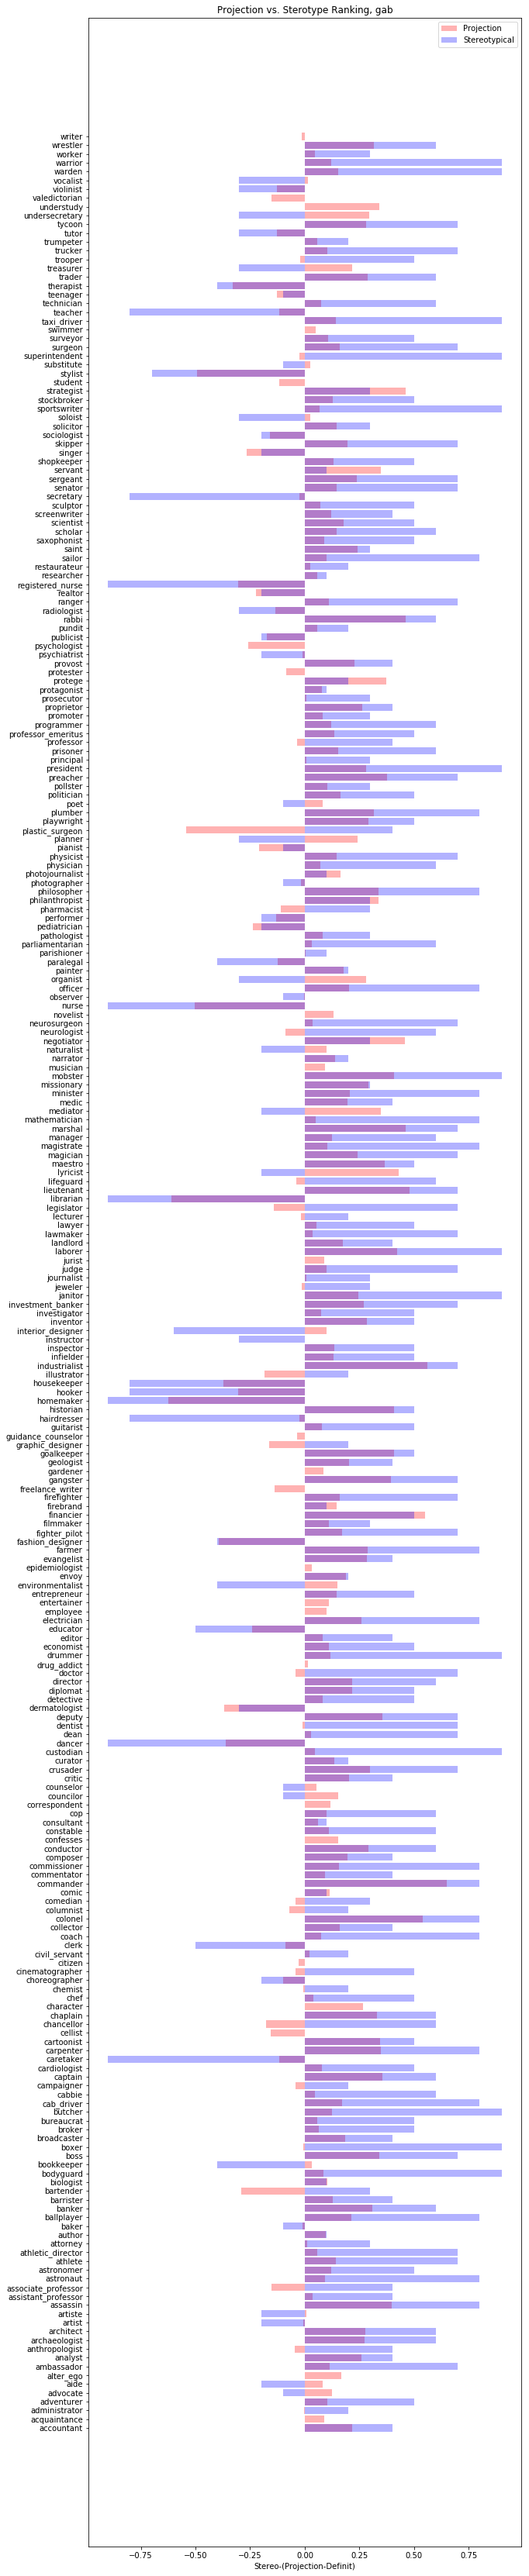

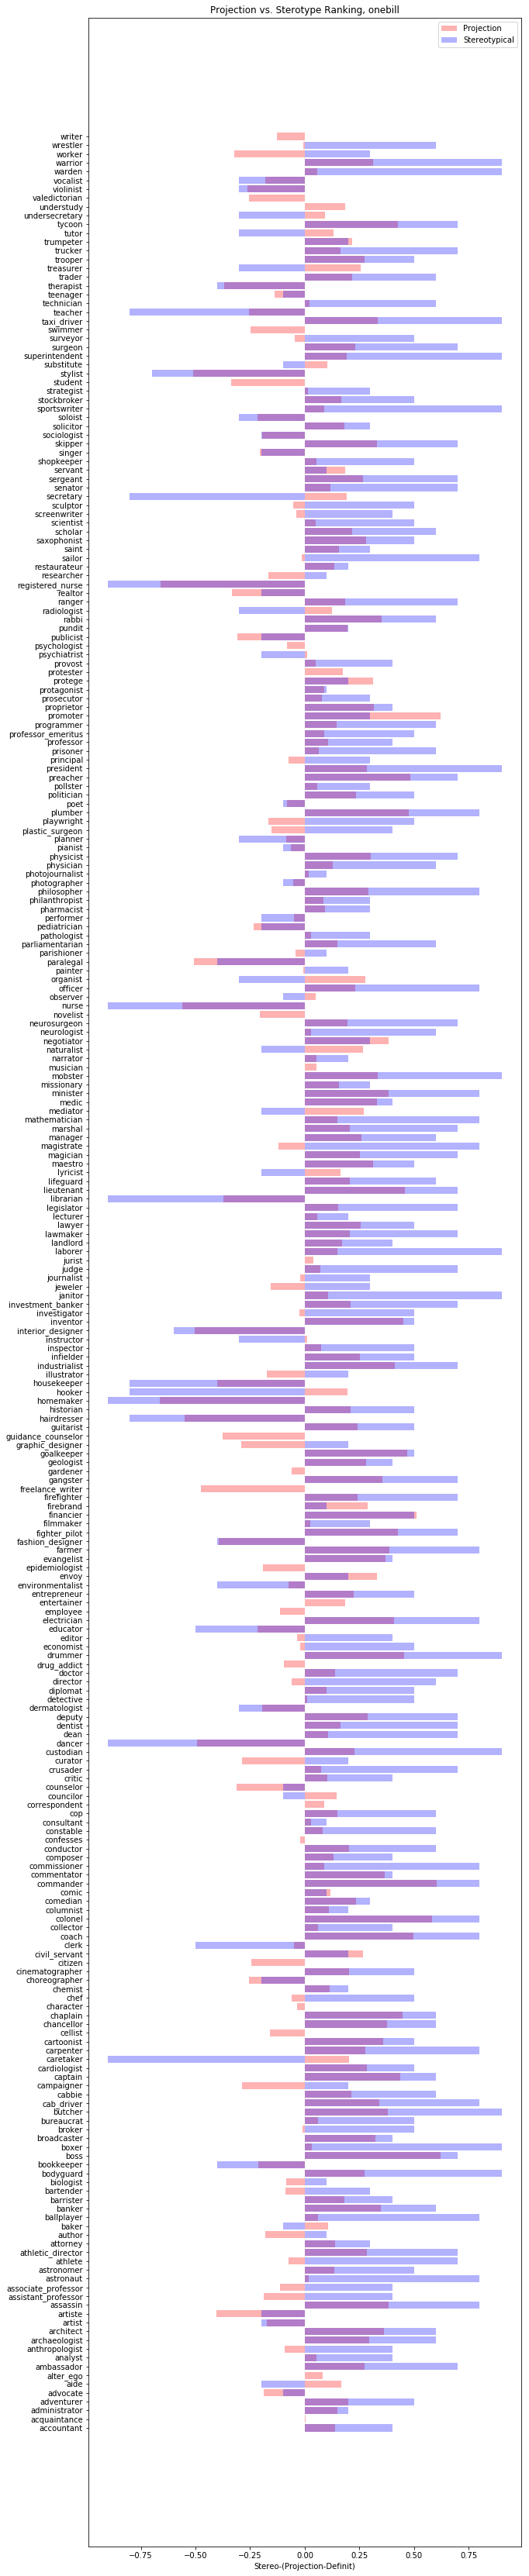

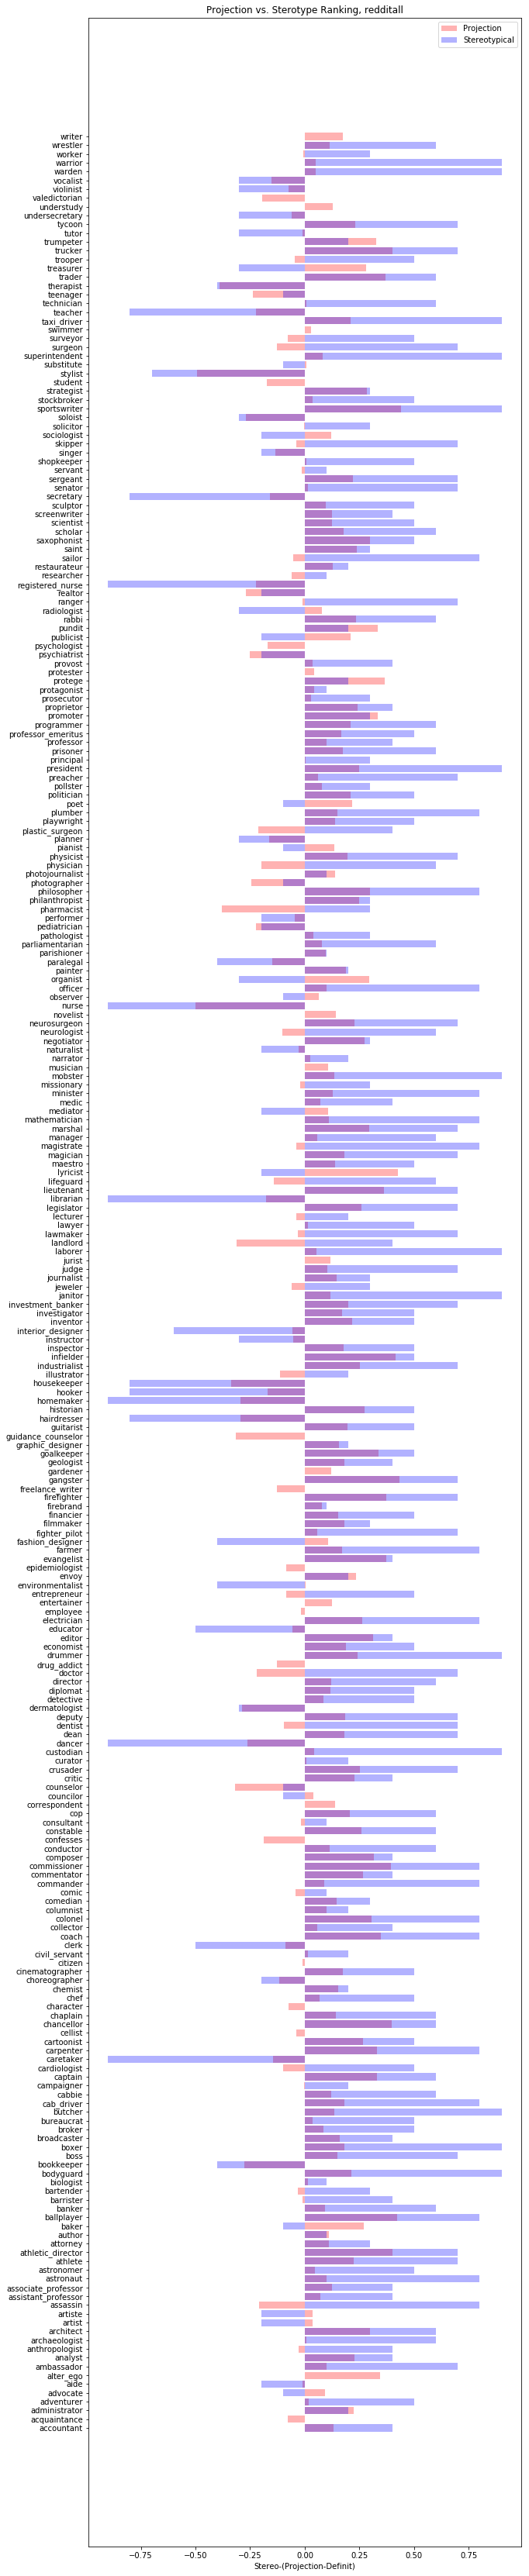

In [39]:
for name,dat in bla.items():
    fig = plt.figure(figsize=(10,60))
    ax = plt.subplot(111)
    ax.barh(filtered, dat.flatten(),color='r',alpha=.3, label='Projection')
    ax.barh(filtered,stereos,color='b',alpha=.3, label='Stereotypical')
    #ax.barh(filtered,defin,color='g',alpha=.3,label='Definitional')
    plt.legend()
    plt.xlabel('Stereo-(Projection-Definit)')
    plt.title('Projection vs. Sterotype Ranking, %s' %(name))
    plt.show()


In [9]:
co_male_words=[w for w,d in co_male if w in male_filtered]
co_male_vals=2*(1-(50+np.array([d for w,d in co_male if w in male_filtered]))/100)
co_female_words=[w for w,d in co_female if w in female_filtered]
co_female_vals=2*(50-np.array([d for w,d in co_female if w in female_filtered]))/100

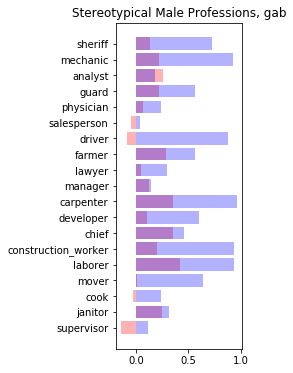

Relative bias of dataset gab on male: 0.4942925982819405


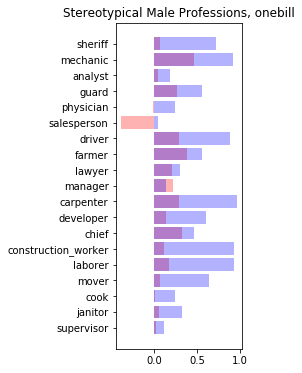

Relative bias of dataset onebill on male: 0.8482667452036963


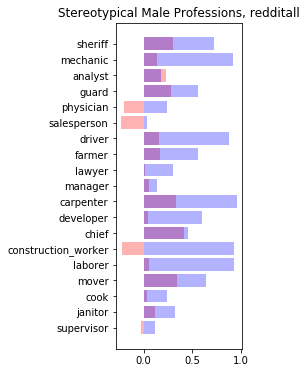

Relative bias of dataset redditall on male: 0.670714772365898


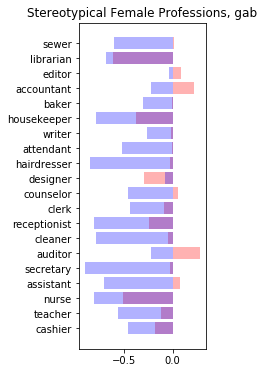

Relative bias of dataset gab on female: 0.575069720347596


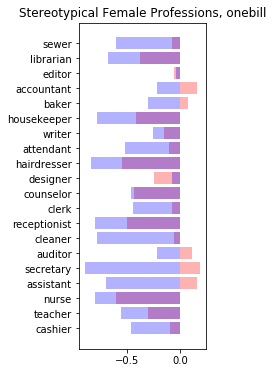

Relative bias of dataset onebill on female: 0.6192841567524752


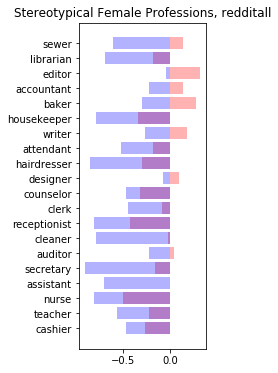

Relative bias of dataset redditall on female: 0.8058454391137564


In [12]:
male_bias=[]
abs_male_bias=[]
conf_mats_male=[]
for name,dat in male_bla.items():
    fig = plt.figure(figsize=(5,6))
    ax = plt.subplot(121)
    ax.barh(co_male_words, np.array(dat).flatten(),color='r',alpha=.3, label='Projection')
    ax.barh(co_male_words,co_male_vals,color='b',alpha=.3, label='Stereotypical')
    #ax.barh(filtered,defin,color='g',alpha=.3,label='Definitional')
    #plt.legend()
    title='Stereotypical Male Professions, %s' %(name)
    plt.title(title)
    plt.savefig('./%s'%(title))
    plt.show()
    datt=np.array(dat).flatten()
    biass=np.mean(np.abs(datt/co_male_vals))
    conf_mats_male+=[[len(datt[datt>0]),len(datt[datt<0])]]

    male_bias+=[biass]
    abs_male_bias+=[np.mean(np.abs(dat))]
    print('Relative bias of dataset %s on male:' %(name),biass)

female_bias=[]
abs_female_bias=[]
conf_mats_female=[]
for name,dat in female_bla.items():
    fig = plt.figure(figsize=(5,6))
    ax = plt.subplot(121)
    ax.barh(co_female_words, np.array(dat).flatten(),color='r',alpha=.3, label='Projection')
    ax.barh(co_female_words,co_female_vals,color='b',alpha=.3, label='Stereotypical')
    #ax.barh(filtered,defin,color='g',alpha=.3,label='Definitional')
    #plt.legend()
    title=('Stereotypical Female Professions, %s' %(name))
    plt.title(title)
    plt.savefig('./%s'%(title))
    plt.show()
    datt=np.array(dat).flatten()
    biass=np.mean(np.abs(datt/co_female_vals))
    conf_mats_female+=[[len(datt[datt>0]),len(datt[datt<0])]]
    abs_female_bias+=[np.mean(np.abs(dat))]
    female_bias+=[biass]
    print('Relative bias of dataset %s on female:' %(name),biass)

In [182]:
print(abs_male_bias)
print(abs_female_bias)
sss=(np.concatenate((np.array(abs_male_bias)[:,None],np.array(abs_female_bias)[:,None]),axis=1))
np.mean(sss,axis=1)

[0.1763486383994738, 0.21845749700949862, 0.17719930801975364]
[0.16276737990054016, 0.21852588028479242, 0.20683442490765805]


array([0.16955801, 0.21849169, 0.19201687])

In [183]:
ssss=(np.concatenate((np.array(male_bias)[:,None],np.array(female_bias)[:,None]),axis=1))
np.mean(ssss,axis=1)

array([0.53468116, 0.76234618, 0.73828011])

In [191]:
ll=[a+b for a,b in zip(conf_mats_male,conf_mats_female)]
ll

[[15, 4, 6, 14], [18, 1, 7, 13], [15, 4, 8, 12]]

In [ ]:
#method 1: best scoring overall
print('Best overall:')
datasets=cw(all_data.common_we,all_data.common_vocab)
clean_ant=datasets.setup(antonyms,antonyms,'best_overall',2)

#show conf matrix of antonym pair axes
print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))


#method 2: best scoring 
print('Best each:')
datasets=cw(all_data.common_we,all_data.common_vocab)
clean_ant=datasets.setup(antonyms,antonyms,'best_each',2)

print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))

#method 3: all
print('all')
datasets=cw(all_data.common_we,all_data.common_vocab)
clean_ant=datasets.setup(antonyms,antonyms,'all',2)
print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))

#lastly, test cv
clean_ant=datasets.setup(antonyms,antonyms,'cv',2)
print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))

In [ ]:
import Util
#wordss=[word for pair in clean_ant for word in pair]
#wordss=[word for pair in datasets.all_datasets['redditall'].scores.keys() for word in pair]
proj=Util.project_on_axis(datasets.all_datasets['redditall'].common_data,datasets.all_datasets['redditall'].principal_dir,words)
list(zip((proj,wordss)))
sum(abs(proj))

In [ ]:
datasets.all_datasets['redditall'].scores

# import Util
# ax=Util.get_common_axis(datasets.all_datasets['redditall'].common_data,'he','she')
# words=[word for pair in clean_ant for word in pair]
# proj=Util.project_on_axis(datasets.all_datasets['redditall'].common_data,ax,words)
# list(zip(words,proj))
# sum(abs(proj))

In [ ]:
datasets.all_datasets['redditall'].scores

In [ ]:
#now, try two axes
clean_ant=datasets.setup(antonyms,antonyms,'best_overall',2)

print(datasets.get_pc_acc(clean_ant))

#show conf matrix of antonym pair axes
datasets.get_confusion_mats(clean_ant)

In [ ]:
#method 2: best scoring each
clean_ant=datasets.setup(antonyms,antonyms,'best_each')

print(datasets.get_confusion_mats(clean_ant))
datasets.get_pc_acc(clean_ant)

In [ ]:
datasets.all_datasets['redditall'].scores

In [ ]:
#method 2: best scoring each - two dms
clean_ant=datasets.setup(antonyms,antonyms,'best_each',2)
print(datasets.get_confusion_mats(clean_ant))
datasets.get_pc_acc(clean_ant)

In [ ]:
bla=datasets.get_skew_scores(profesions=profs)
print(bla['redditall'])
print(sorted(bla['redditall'], key=lambda x: x[1]))

for name,dat in bla.items():
    tot=sum([val for name,val in dat])
    print(name,tot)

In [ ]:
#method 3: all
clean_ant=datasets.setup(antonyms,antonyms,'all')
print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))

In [ ]:
#method 3: all -two dims
clean_ant=datasets.setup(antonyms,antonyms,'all',2)
print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))

In [ ]:
#lastly, test cv
clean_ant=datasets.setup(antonyms,antonyms,'cv')
print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))

In [ ]:
bla=datasets.get_skew_scores(profesions=profs)

print(sorted(bla['redditall'], key=lambda x: x[1])[-10:])

for name,dat in bla.items():
    tot=sum([val for name,val in dat])
    print(name,tot)

In [ ]:
#lastly, test cv
clean_ant=datasets.setup(antonyms,antonyms,'cv',2)
print(datasets.get_confusion_mats(clean_ant))
print(datasets.get_pc_acc(clean_ant))